# Przekształcenia wstępne szeregu

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

#from google.colab import files
#src = list(files.upload().values())[0]
#open('ts_utils.py','wb').write(src)

#from ts_utils import check_time_series_stationary
from statsmodels.graphics.tsaplots import plot_acf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# #funkcja do badania stacjonarności
# from statsmodels.tsa.stattools import adfuller
# def check_time_series_stationary(y, rolling_len = 12):
    
#     y = pd.Series(y)
    
#     df_test = adfuller(y)
    
#     if df_test[1] < 0.05:
#         print('Szereg jest stacjonarny')
#     else:
#         print('Szereg jest niestacjonarny')
    
#     print("{0:^32s}".format("Dickey-Fuller Test"))
#     print("-"*32+"\n")
    
#     print("{0:<20s}: {1:>10.4f}".format('Test Statistic', df_test[0]))
#     print("{0:<20s}: {1:>10.4f}".format('p-value', df_test[1]))
#     print("-"*32+"\n")
    
#     rolling_mean = y.rolling(rolling_len).mean()
#     rolling_var = y.rolling(rolling_len).var()

#     plt.plot(y)
#     plt.plot(rolling_mean, label="Rolling mean")
#     plt.plot(rolling_var, label="Rolling var")
#     plt.legend()
#     plt.show()
    
#     print("{0:^32s}".format("Autocorrelation plot"))
#     print("-"*32+"\n")
#     pd.plotting.autocorrelation_plot(y)
#     plt.show()

Chcemy umieć odwzorować zmiany w szeregu za pomocą modeli. Najłatwiej jest zamodelować szeregi stacjonarne. Tak więc przed przystąpieniem do analizy i prognozowania szeregów powinniśmy odpowiednio przygotować nasze dane.

Przy użyciu określonych przekształceń, możemy 
- wyeliminować z szeregu składowe zmienności,
- ułatwić identyfikację regularnych tendencji.

## Transformacja logarytmiczna

Jeśli w analizowanych danych dostrzegamy, że wariancja wzrasta lub maleje wraz z poziomem szeregu, przydatne może być zastosowanie transformacji logarytmicznej.

Używająć logarytmu, możemy ustabilizować wariancję, a potem kontynuawać kolejne kroki analizy.
Stabilizacja wariancji jest konieczna dla zastosowania modeli stacjonarnych.

**Transformacja logarytmiczna/potęgowa danych przydatna jest między innymi w następujących przypadkach:**
- występowanie wzrostu (lub spadku) amplitudy wahań sezonowych w kolejnych okresach, 
- niejednorodnej zmienności danych w kolejnych okresach,
- dużego wpływu obserwacji odstających

In [ ]:
air_passengers = pd.read_csv('AirPassengers.csv', parse_dates=['Month'], index_col='Month')

In [ ]:
air_passengers.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


## Różnicowanie 

Operację różnicowania stosujemy między innymi w celu przekształcenia danych do postaci **stacjonarnej**.

Róznicowanie sprowadza się do zastąpienia oryginalnych danych szeregiem różnic, wyznaczonych dla ustalonych opóźnień czasowych. Dobierając odpowiednio parametry różnicowania możemy wyeliminować z danych trend liniowy, kwadratowy, wielomianowy, a także sezonowość. 

### Róźnicowanie z opóźnieniem 1

Wczytaj dane `USGDP.csv` przedstawiające informację na temat kwartalnego produktu krajowego brutto w USA w latach 1947-2006, a następnie zastosuj różnicowanie z opóźnieniem 1 i sprawdź stacjonarność otrzymanego szeregu.

In [ ]:
usgdp = pd.read_csv('USGDP.csv', 
                 parse_dates=['DATE'], index_col='DATE')

usgdp.head()

,GDPC1
DATE,
1947-01-01,2033.061
1947-04-01,2027.639
1947-07-01,2023.452
1947-10-01,2055.103
1948-01-01,2086.017


### Róźnicowanie z opóźnieniem sezonowym

Różnicowanie szeregu zawierające dwie składowe systematyczne -- trend i sezonowość.

## Zadanie - `co2`

Wczytaj dane `co2_interpolated.csv` wskazujące stężenie CO2 w atmosferze (więcej pod [linkiem](https://datahub.io/core/co2-ppm)). Następnie korzystając z powyższych metod, spróbuj doprowadzić szereg do postaci stacjonarnej.

In [ ]:
co2 = pd.read_csv('co2_interpolated.csv', parse_dates=['Date'], index_col='Date')
co2.head()

,CO2
Date,
1958-03-01,315.71
1958-04-01,317.45
1958-05-01,317.50
1958-06-01,317.10
1958-07-01,315.86


## Zadanie - `a10`
Wczytaj dane ` a10.csv` opisujące miesięczną sprzedaż leków przeciwcukrzycowych w Australii w latach 1992–2008. Następnie korzystając z powyższych metod, spróbuj doprowadzić szereg do postaci stacjonarnej.

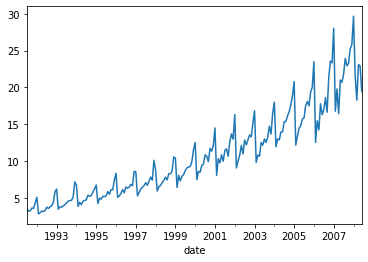

In [ ]:
a10 = pd.read_csv('a10.csv', parse_dates=['date'], index_col='date')
a10.plot(legend=False)

## Zadanie - `daily-min-temperatures`
Wczytaj dane `daily-min-temperatures.csv` opisujący minimalne dzienne temperatury w ciągu 10 lat (1981-1990) w Melbourne w Australii. Następnie korzystając z powyższych metod, spróbuj doprowadzić szereg do postaci stacjonarnej.

In [ ]:
daily_temp = pd.read_csv('daily-min-temperatures.csv', 
                 parse_dates=['Date'], index_col='Date')

## Zadanie - `daily-total-female-births`
Wczytaj dane `daily-total-female-births.csv` przedstawiające całkowitą liczbę urodzeń kobiet zarejestrowanych w Kalifornii w USA w 1959 roku. Następnie korzystając z powyższych metod, spróbuj doprowadzić szereg do postaci stacjonarnej.

In [ ]:
daily_birth = pd.read_csv('daily-total-female-births.csv', 
                 parse_dates=['Date'], index_col='Date')
daily_birth.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44
